In [18]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scvelo as scv
from scipy import stats
import os


In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
sc.settings.verbosity = 0  


## Import zUMI Dataset

In [ ]:
#Import all datasets datasets
st08_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt08/zUMIs_output/velocity/zUMI_scCapSt08.loom', )

st105_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt105/zUMIs_output/velocity/zUMI_scCapSt105.loom')

st12_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt12/zUMIs_output/velocity/zUMI_scCapSt12.loom')

st13_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt13/zUMIs_output/velocity/zUMI_scCapSt13.loom')

st16_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt16/zUMIs_output/velocity/zUMI_scCapSt16.loom')

st18_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt18/zUMIs_output/velocity/zUMI_scCapSt18.loom')

st20_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt20/zUMIs_output/velocity/zUMI_scCapSt20.loom')

st22_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt22/zUMIs_output/velocity/zUMI_scCapSt22.loom')

st24_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt24/zUMIs_output/velocity/zUMI_scCapSt24.loom')

st27_z = sc.read_loom(
    '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt27/zUMIs_output/velocity/zUMI_scCapSt27.loom')



In [ ]:
st08_z.obs['stage'] = 'st08'
st105_z.obs['stage'] = 'st10.5'
st12_z.obs['stage'] = 'st12'
st13_z.obs['stage'] = 'st13'
st16_z.obs['stage'] = 'st16'
st18_z.obs['stage'] = 'st18'
st20_z.obs['stage'] = 'st20'
st22_z.obs['stage'] = 'st22'
st24_z.obs['stage'] = 'st24'
st27_z.obs['stage'] = 'st27'

In [13]:
datasets_z = [st08_z, st105_z, st12_z, st13_z, st16_z, st18_z, st20_z, st22_z, st24_z, st27_z] 



In [22]:

def save_intermediate_files(datasets, temp_dir, file_name_template, identifier):
    for d in datasets:
        file = os.path.join('.', temp_dir, file_name_template + '_' + d.obs[identifier][0] + '.h5ad')
        d.write(file, compression='gzip')
        
identifiers = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27']
      
def load_intermediate_files(temp_dir, file_name_template, identifiers):
    ob_list = []
    for i in identifiers:
        file = os.path.join('.', temp_dir, file_name_template + '_' + i+ '.h5ad')
        ob_list.append(sc.read_h5ad(file))
    return ob_list

In [160]:
save_intermediate_files(datasets_z, 'intermediate_files', 'zUMI_Unprocessed' , 'stage')

... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
... storing 'stage' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
.

In [23]:

st08_z, st105_z, st12_z, st13_z, st16_z, st18_z, st20_z, st22_z, st24_z, st27_z = load_intermediate_files( 'intermediate_files', 'zUMI_Unprocessed' , identifiers)

In [24]:
datasets_z = [st08_z, st105_z, st12_z, st13_z, st16_z, st18_z, st20_z, st22_z, st24_z, st27_z]

## Preprocess

In [25]:
# add the total counts per cell as observations-annotation to adata
for d in datasets_z:
    d.obs['n_counts'] = d.X.sum(axis=1).A1
    d.obs['n_genes'] = (d.X != 0).sum(axis=1)

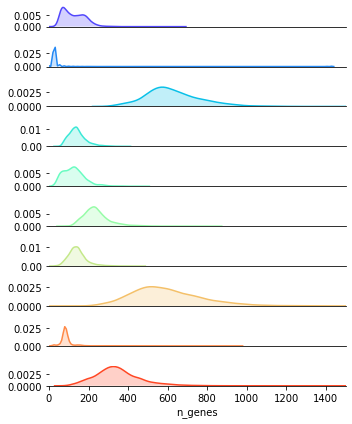

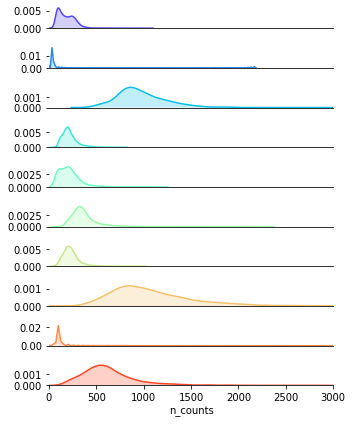

In [15]:
pal = sns.color_palette(
            'rainbow', 10)

fig, axs = plt.subplots(10,1, figsize=(5, 6), facecolor='w' )
axs = axs.ravel()   

for i in range(len(datasets_z)):
    sns.distplot(datasets_z[i].obs.n_genes, ax = axs[i], hist = False,color=pal[i] , kde_kws={'shade':True})
    #axs[i].set_yticks([])
    axs[i].set_ylabel('')
    if i < 9:
        axs[i].set_xticks([])
        
        axs[i].set_xlabel('')
        #axs[i].despine(bottom=True, left=True)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].set_xlim(0, 1500)
    plt.tight_layout()
        
plt.savefig('./intermediate_files/Figures/Distplot_genes_raw.pdf',dpi = 500)


fig, axs = plt.subplots(10,1, figsize=(5, 6), facecolor='w')
axs = axs.ravel()   
for i in range(len(datasets_z)):
    sns.distplot(datasets_z[i].obs.n_counts, ax = axs[i], hist = False,color=pal[i], kde_kws={'shade':True})
    #axs[i].set_yticks([])
    axs[i].set_ylabel('')
    if i < 9:
        axs[i].set_xticks([])
        
        axs[i].set_xlabel('')
        #axs[i].despine(bottom=True, left=True)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].set_xlim(0, 3000)
    plt.tight_layout()
plt.savefig('./intermediate_files/Figures/Distplot_counts_raw.pdf',dpi = 500)

In [28]:


st08_z, st105_z, st12_z, st13_z, st16_z, st18_z, st20_z, st22_z, st24_z, st27_z = datasets_z



## Running Emptydrops

run emptydrops using R script: run_empty_drops.R


In [29]:
file_path = '/work/sduknn/Andreas/xenopus/zUMI_out/scCapSt{}/zUMIs_output/expression/zUMI_scCapSt{}.csv'




In [30]:
datasets_new = []
m = {True:'Cell', False:'Background'}
for dx , d in enumerate(datasets_z):
    
    stage = datasets_z[dx].obs['stage'][0].replace('.', '').replace('st', '')
    print(stage)
    bcs = pd.read_csv(file_path.format(stage,stage), header = None)
    bcs =[bc for bc in bcs[0].tolist()]
    
    
    datasets_z[dx].obs['Empty_drops'] = [m[x in bcs] for x in datasets_z[dx].obs_names]

    

08
105
12
13
16
18
20
22
24
27


In [33]:
sc.concat(datasets_z).obs.Empty_drops.to_csv('Sup_tables/Empty_drops.tsv', sep = '\t')

In [71]:
from matplotlib.lines import Line2D

In [166]:
m = {'Cell':'#8291f5', 'Background':'#d9dbde'}


In [65]:

for idx, d in enumerate(datasets_z):
    #Remove empty drops classified non-cells
    datasets_z[idx] = datasets_z[idx][datasets_z[idx].obs['Empty_drops'] == 'Cell', :]
    sc.pp.filter_cells(datasets_z[idx], min_genes=80)
    sc.pp.filter_genes(datasets_z[idx], min_cells=3)

In [66]:

sc.pp.filter_cells(datasets_z[1], min_genes=300) #st10.5
sc.pp.filter_genes(datasets_z[1], min_cells=3)

sc.pp.filter_cells(datasets_z[8], min_genes=300) #st24
sc.pp.filter_genes(datasets_z[8], min_cells=3)

### zUMI Datasets

In [80]:
#filter the data
#st08_z = st08_z[st08_z.obs['n_genes'] < 300, :]
#st08_z = st08_z[st08_z.obs['n_counts'] < 450, :]

#st105_z = st105_z[st105_z.obs['n_genes'] < 1000, :]
#st105_z = st105_z[st105_z.obs['n_counts'] < 1500, :]

#st12_z = st12_z[st12_z.obs['n_genes'] < 1200, :]
#st12_z = st12_z[st12_z.obs['n_counts'] < 2000, :]

#st13_z = st13_z[st13_z.obs['n_genes'] < 300, :]
#st13_z = st13_z[st13_z.obs['n_counts'] < 500, :]

#st16_z = st16_z[st16_z.obs['n_genes'] < 300, :]
#st16_z = st16_z[st16_z.obs['n_counts'] < 600, :]

#st18_z = st18_z[st18_z.obs['n_genes'] < 500, :]
#st18_z = st18_z[st18_z.obs['n_counts'] < 900, :]

#st20_z = st20_z[st20_z.obs['n_genes'] < 350, :]
#st20_z = st20_z[st20_z.obs['n_counts'] < 600, :]

#st22_z = st22_z[st22_z.obs['n_genes'] < 1200, :]
#st22_z = st22_z[st22_z.obs['n_counts'] < 2500, :]

#st24_z = st24_z[st24_z.obs['n_genes'] < 800, :]
#st24_z = st24_z[st24_z.obs['n_counts'] < 1100, :]

#st27_z = st27_z[st27_z.obs['n_genes'] < 800, :]
#st27_z = st27_z[st27_z.obs['n_counts'] < 2000, :]




#st13_z = sc.pp.filter_cells(st13_z, min_genes=200, copy=True)
#st13_z = sc.pp.filter_genes(st13_z, min_cells=3, copy=True)

#st18_z = sc.pp.filter_cells(st18_z, min_genes=200, copy=True)
#st18_z = sc.pp.filter_genes(st18_z, min_cells=3, copy=True)

#st24_z = sc.pp.filter_cells(st24_z, min_genes=300, copy=True)
#st24_z = sc.pp.filter_genes(st24_z, min_cells=3, copy=True)




## Using scrublet to classify doublets

In [70]:

import scrublet as scr

In [71]:
def run_scrublet(datasets): 
    for idx, i in enumerate(datasets):
        scrub = scr.Scrublet(datasets[idx].X, expected_doublet_rate=0.06)
        
        doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
        m = {False:'Singlet', True:'Doublet'}
        datasets[idx].obs['scrublet_classify'] = [m[x] for x in predicted_doublets]
        datasets[idx].obs['scrublet_scores'] = doublet_scores

In [72]:
run_scrublet(datasets_z)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 66.7%
Elapsed time: 5.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 60.0%
Elapsed time: 0.8 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 2.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 25.0%
Elapsed time: 1.0 seconds
Preprocessing...
Simulating doublets.

In [73]:
st08_z, st105_z, st12_z, st13_z, st16_z, st18_z, st20_z, st22_z, st24_z, st27_z = datasets_z
datasets_z = [st08_z, st105_z, st12_z, st13_z, st16_z, st18_z, st20_z, st22_z, st24_z, st27_z]



In [181]:
datasets_save = remove_doublets(datasets_z)
save_intermediate_files(datasets_save, 'intermediate_files', 'zUMI_raw_singlets' , 'stage')

... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical
... storing 'scrublet_classify' as categorical


In [34]:
st08_z, st105_z, st12_z, st13_z, st16_z, st18_z, st20_z, st22_z, st24_z, st27_z = load_intermediate_files( 'intermediate_files', 'zUMI_raw_singlets' , identifiers)


datasets_z = [st08_z, st105_z, st12_z, st13_z, st16_z, st18_z, st20_z, st22_z, st24_z, st27_z]

In [37]:
sc.concat(datasets_z).obs_names#.scrublet_classify

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Index(['AAACGGGCAGTCAGCC', 'AAACCTGCAATTCCTT', 'AACCGCGAGCAGGTCA',
       'AAAGATGAGATACACA', 'AACGTTGGTCGACTGC', 'AACACGTGTTAAAGAC',
       'AAACCTGCACCAACCG', 'AACACGTCACGCGAAA', 'AACACGTGTCTGGAGA',
       'AACCGCGTCGCCTGAG',
       ...
       'TTGTAGGGTCAACATC', 'TTGTAGGTCACAATGC', 'TTTGCGCGTCAGAATA',
       'TTTGGTTTCAGATAAG', 'TTTATGCCAGCCTTGG', 'TTTGGTTTCTTTAGGG',
       'TTTCCTCAGAAGGTGA', 'TTTGCGCAGAGTGACC', 'TTTATGCTCAACACTG',
       'TTGTAGGGTAGCTGCC'],
      dtype='object', name='index', length=33990)

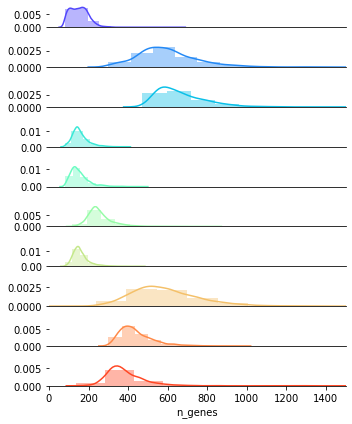

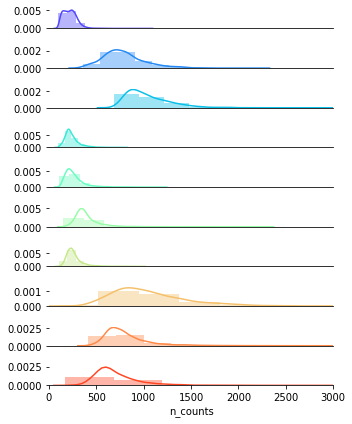

In [12]:
pal = sns.color_palette(
            'rainbow', 10)

fig, axs = plt.subplots(10,1, figsize=(5, 6), facecolor='w' )
axs = axs.ravel()   

for i in range(len(datasets_z)):
    sns.distplot(datasets_z[i].obs.n_genes, ax = axs[i], hist = True,color=pal[i] , kde_kws={'shade':False}, bins = 10)
    #axs[i].set_yticks([])
    axs[i].set_ylabel('')
    if i < 9:
        axs[i].set_xticks([])
        
        axs[i].set_xlabel('')
        #axs[i].despine(bottom=True, left=True)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].set_xlim(0, 1500)
    plt.tight_layout()
        
plt.savefig('./intermediate_files/Figures/Distplot_genes_filtered.pdf',dpi = 500)


fig, axs = plt.subplots(10,1, figsize=(5, 6), facecolor='w')
axs = axs.ravel()   
for i in range(len(datasets_z)):
    sns.distplot(datasets_z[i].obs.n_counts, ax = axs[i], hist = True,color=pal[i], kde_kws={'shade':False}, bins = 10)
    #axs[i].set_yticks([])
    axs[i].set_ylabel('')
    if i < 9:
        axs[i].set_xticks([])
        
        axs[i].set_xlabel('')
        #axs[i].despine(bottom=True, left=True)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].set_xlim(0, 3000)
    plt.tight_layout()
plt.savefig('./intermediate_files/Figures/Distplot_counts_filtered.pdf',dpi = 500)

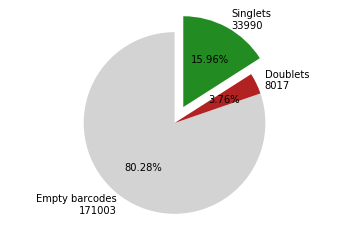

In [17]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Empty barcodes\n{}'.format(213010 - 42007), 'Doublets\n{}'.format(42007-33990), 'Singlets\n{}'.format(33990)
sizes = [213010 - 42007, 42007-33990, 33990]
explode = (0, 0, 0.2) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=90, colors = ['lightgrey', 'firebrick', 'forestgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('QC_pie_chart.pdf')